In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
# Імпортуємо потрібний DataFrame
df = pd.read_csv('data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,2.208274,9
940,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,2.646175,16
941,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,2.091864,7
942,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,2.406945,10


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      944 non-null    object 
 1   sex         944 non-null    object 
 2   age         944 non-null    int64  
 3   address     944 non-null    object 
 4   famsize     944 non-null    object 
 5   Pstatus     944 non-null    object 
 6   Medu        944 non-null    int64  
 7   Fedu        944 non-null    int64  
 8   Mjob        944 non-null    object 
 9   Fjob        944 non-null    object 
 10  reason      944 non-null    object 
 11  guardian    944 non-null    object 
 12  traveltime  944 non-null    int64  
 13  studytime   944 non-null    int64  
 14  failures    944 non-null    int64  
 15  schoolsup   944 non-null    object 
 16  famsup      944 non-null    object 
 17  paid        944 non-null    object 
 18  activities  944 non-null    object 
 19  nursery     944 non-null    o

In [22]:
# Перевіряєм чи є незаповнені данні у DataFrame
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
sem           0
GRADE         0
dtype: int64

In [23]:
# Розділяєм ознаки на числові і не числові
text_features = [i for i in df.columns if type(df[i][0]) == str]
nums_features = [i for i in df.columns if i not in text_features]

<Axes: >

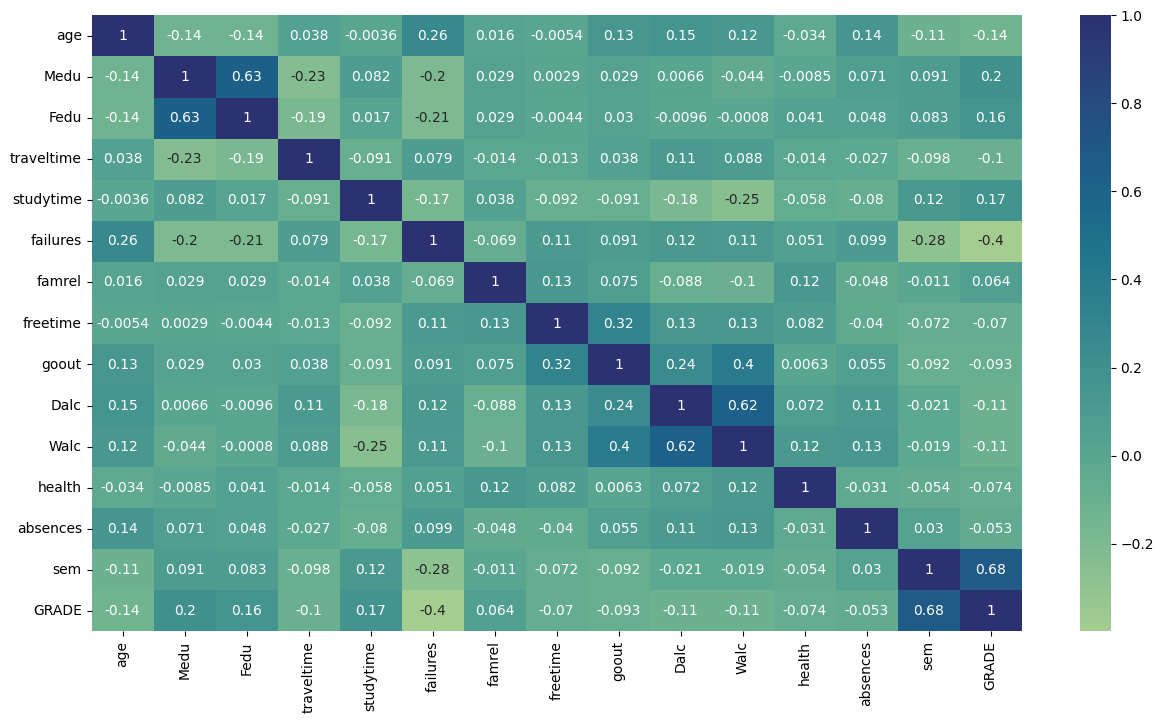

In [24]:
# Розглянемо кореляцію  цільвої змінної і числових ознак
plt.figure(figsize=(15,8))
sns.heatmap(df.corr( numeric_only=True ),annot=True,cmap="crest")

<Axes: xlabel='GRADE', ylabel='Count'>

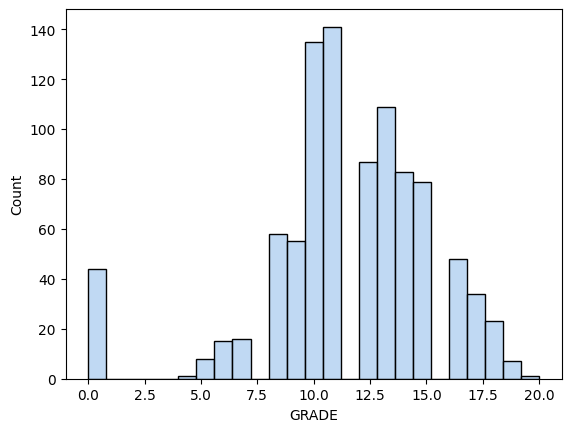

In [25]:
# Розпреділення цільвої змінної
sns.histplot(df,x='GRADE',color='#abcdef')

<Figure size 1500x10000 with 0 Axes>

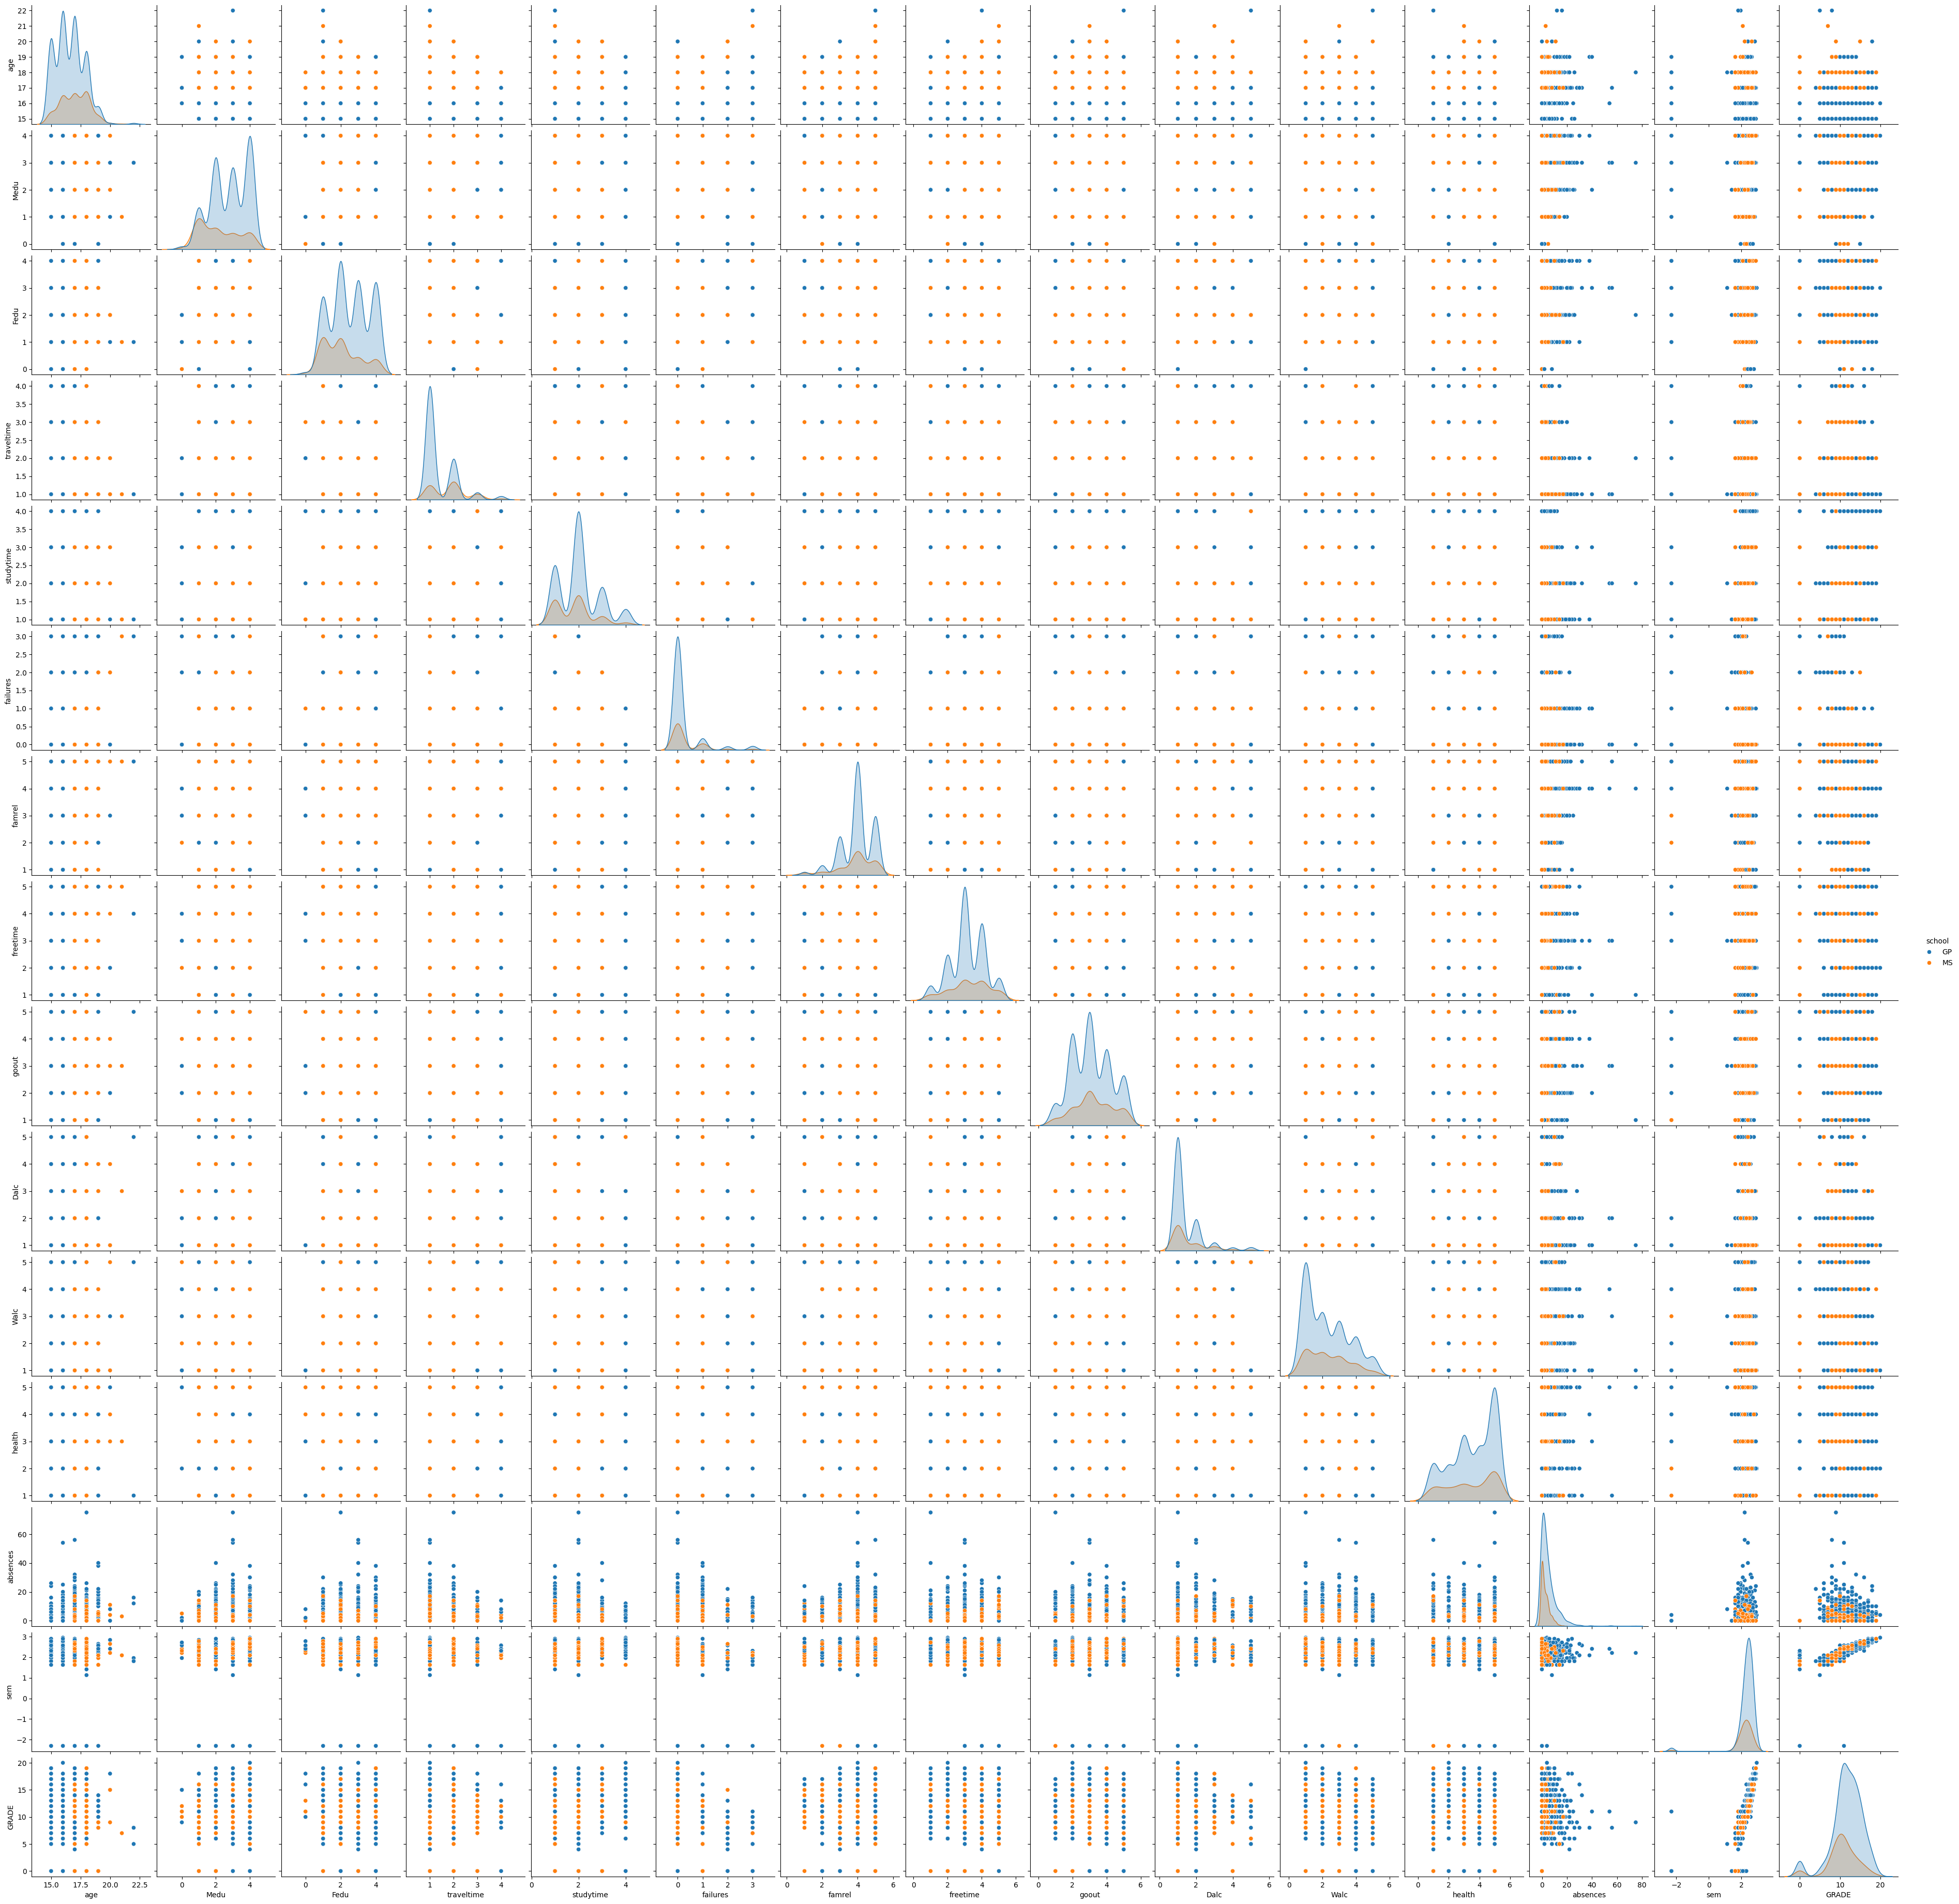

In [26]:
# Розглянем як різні ознаки поводяться відносно одна одної
plt.figure(figsize=(15,100))
sns.pairplot(df , x_vars = nums_features , y_vars = nums_features , hue='school')

In [27]:
# Приводим всі колонки дата фрейму до числового вигляду за допомогою OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder


columns_ohe = make_column_transformer(
    ( OneHotEncoder(handle_unknown='ignore',sparse_output=False) , text_features),
    remainder = 'passthrough'
).set_output(transform='pandas')

In [53]:
# Отримуємо DataFrame який повністю складений з числових ознак
df_ohe = columns_ohe.fit_transform(df)
df_ohe


,onehotencoder__school_GP,onehotencoder__school_MS,onehotencoder__sex_F,onehotencoder__sex_M,onehotencoder__address_R,onehotencoder__address_U,onehotencoder__famsize_GT3,onehotencoder__famsize_LE3,onehotencoder__Pstatus_A,onehotencoder__Pstatus_T,...,remainder__failures,remainder__famrel,remainder__freetime,remainder__goout,remainder__Dalc,remainder__Walc,remainder__health,remainder__absences,remainder__sem,remainder__GRADE
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,4,3,4,1,1,3,4,-2.302585,11
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,5,3,3,1,1,3,2,2.208274,11
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,4,3,2,2,3,3,6,2.493205,12
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,3,2,2,1,1,5,0,2.646175,14
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,4,3,2,1,2,5,0,2.406945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2,5,5,4,4,5,4,11,2.208274,9
940,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,2,4,5,3,4,2,3,2.646175,16
941,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,5,5,3,3,3,3,3,2.091864,7
942,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,4,4,1,3,4,5,0,2.406945,10


In [29]:
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split


# Вибірка для Завдання 2
X_num = df[nums_features[:-1]]
y = (df[nums_features[-1]])
X_num.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,16.688559,2.636653,2.404661,1.507415,1.985169,0.253178,3.940678,3.192797,3.145127,1.475636,2.282839,3.527542,4.385593,2.284653
std,1.204638,1.129181,1.098258,0.723744,0.832653,0.645147,0.907538,1.028188,1.137949,0.877091,1.268545,1.434791,6.331564,0.679939
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.302585
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.208274
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,2.406945
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,2.572612
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,2.949688


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer


# Розділяєм числовий DataFrame на тренувальну та валідаційну вибірку
X_num_for_train , X_num_for_validation , y_num_for_train , y_num_for_validation = train_test_split(X_num,y,test_size= 0.1,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_num_for_train = QuantileTransformer().fit_transform(X_num_for_train)
X_num_for_validation = QuantileTransformer().fit_transform(X_num_for_validation)


pd.DataFrame(X_num_for_train,columns=X_num.columns).describe()



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (849). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (95). n_quantiles is set to n_samples.
  warnings.warn(


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.483209,0.546728,0.524534,0.316425,0.460538,0.154714,0.536341,0.502897,0.508975,0.261297,0.434241,0.560978,0.440729,0.500008
std,0.306384,0.339931,0.315196,0.396911,0.326977,0.344460,0.319120,0.286185,0.300066,0.393646,0.361363,0.372604,0.353790,0.287996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.323113,0.323113,0.397995,0.000000,0.000000,0.000000,0.479953,0.426887,0.181604,0.000000,0.000000,0.192807,0.000000,0.271816
50%,0.597288,0.575472,0.397995,0.000000,0.533608,0.000000,0.479953,0.426887,0.468750,0.000000,0.482311,0.548939,0.451651,0.518868
75%,0.837264,1.000000,0.666863,0.755307,0.533608,0.000000,1.000000,0.767099,0.744693,0.792453,0.699292,1.000000,0.748231,0.752358
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:

# LinearRegressions по Вибірці з виключно числових ознак
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression


cv = 15
linear_regresions_X_num = cross_validate(LinearRegression(), X_num_for_train, y_num_for_train , cv = cv ,n_jobs = -1 , return_estimator = True , return_train_score = True)

linear_regresions_X_num_cv_result = pd.DataFrame(data = linear_regresions_X_num).drop(columns=['fit_time','score_time'])

linear_regresions_X_num_cv_result.sort_values(['test_score','train_score'],ascending=False)





,estimator,test_score,train_score
1,LinearRegression(),0.835099,0.741880
10,LinearRegression(),0.814745,0.743761
2,LinearRegression(),0.787408,0.745994
4,LinearRegression(),0.785165,0.745620
9,LinearRegression(),0.784825,0.744653
7,LinearRegression(),0.780816,0.745809
5,LinearRegression(),0.757511,0.747461
8,LinearRegression(),0.721798,0.750077
6,LinearRegression(),0.721375,0.749080
14,LinearRegression(),0.713223,0.750410


In [32]:
# LinearRegression з найкращим співвідношення коефіцієнту детермінації на test_score і r2_score_on_X_num_test
linear_regresion_X_num = linear_regresions_X_num_cv_result.loc[0][0]

# Коефіцієнт детермінації найкращої лінійної моделі на відкладеній вибірці
linear_regresion_X_num_score = r2_score(y_num_for_validation,np.floor(linear_regresion_X_num.predict(X_num_for_validation)))
linear_regresion_X_num_score

/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_8916/1911777577.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_regresion_X_num = linear_regresions_X_num_cv_result.loc[0][0]


0.7876668737593381

In [33]:
# Lassoes по Вибірці з виключно числових ознак
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


params = [0.0001,0.001,0.01,0.1,1,10,100,100]


Lassoes_X_num = GridSearchCV(
    estimator = Lasso(),
    param_grid = {'alpha': params,'selection':['cyclic', 'random']},
    cv = cv,
    n_jobs = -1,
).fit(X_num_for_train,y_num_for_train)


Lassoes_X_num_cv_result = pd.DataFrame(Lassoes_X_num.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])


In [34]:
Lassoes_X_num_cv_result

,param_alpha,param_selection,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0001,cyclic,"{'alpha': 0.0001, 'selection': 'cyclic'}",0.680505,0.835174,0.787521,0.681321,0.785210,0.757596,0.721449,...,0.721888,0.784782,0.814785,0.693777,0.612037,0.698914,0.713286,0.737941,0.058562,5
1,0.0001,random,"{'alpha': 0.0001, 'selection': 'random'}",0.680504,0.835174,0.787522,0.681282,0.785210,0.757597,0.721470,...,0.721888,0.784782,0.814785,0.693776,0.612041,0.698910,0.713285,0.737940,0.058564,6
2,0.001,cyclic,"{'alpha': 0.001, 'selection': 'cyclic'}",0.680146,0.835841,0.788528,0.682362,0.785606,0.758350,0.722280,...,0.722686,0.784344,0.815123,0.693961,0.611239,0.699150,0.713887,0.738324,0.058767,3
3,0.001,random,"{'alpha': 0.001, 'selection': 'random'}",0.680146,0.835797,0.788511,0.682367,0.785594,0.758350,0.722279,...,0.722696,0.784342,0.815120,0.693973,0.611240,0.699142,0.713886,0.738319,0.058759,4
4,0.01,cyclic,"{'alpha': 0.01, 'selection': 'cyclic'}",0.676590,0.839374,0.794952,0.688665,0.788520,0.761557,0.726745,...,0.728293,0.780874,0.816448,0.694903,0.603716,0.699143,0.719527,0.740321,0.060533,1
5,0.01,random,"{'alpha': 0.01, 'selection': 'random'}",0.676592,0.839379,0.794958,0.688639,0.788525,0.761554,0.726721,...,0.728253,0.780872,0.816448,0.694899,0.603732,0.699151,0.719529,0.740317,0.060533,2
6,0.1,cyclic,"{'alpha': 0.1, 'selection': 'cyclic'}",0.615958,0.827798,0.799036,0.665233,0.782922,0.763436,0.737561,...,0.701113,0.754439,0.819939,0.667654,0.553506,0.699113,0.717969,0.725277,0.074261,7
7,0.1,random,"{'alpha': 0.1, 'selection': 'random'}",0.615957,0.827797,0.799037,0.665232,0.782921,0.763435,0.737559,...,0.701121,0.754424,0.819922,0.667628,0.553503,0.699111,0.717968,0.725272,0.074259,8
8,1,cyclic,"{'alpha': 1, 'selection': 'cyclic'}",-0.021510,-0.002324,-0.006768,-0.000029,-0.004360,-0.018151,-0.024846,...,-0.011363,-0.003254,-0.001407,-0.023601,-0.011986,-0.014444,-0.005096,-0.010656,0.008033,9
9,1,random,"{'alpha': 1, 'selection': 'random'}",-0.021510,-0.002324,-0.006768,-0.000029,-0.004360,-0.018151,-0.024846,...,-0.011363,-0.003254,-0.001407,-0.023601,-0.011986,-0.014444,-0.005096,-0.010656,0.008033,9


In [35]:
#з Lasso найкращим коефіцієнтом детермінації 
Lasso_X_num = Lassoes_X_num.best_estimator_


# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Lasso_X_num_score = r2_score(y_num_for_validation,np.floor(Lasso_X_num.predict(X_num_for_validation)))


Lasso_X_num_score




0.7963041534708226

In [36]:
# Ridges по Вибірці з виключно числових ознак
from sklearn.linear_model import Ridge


Ridges_X_num = GridSearchCV(
    estimator = Ridge(),
    param_grid = {'alpha': params,'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']},
    cv = cv,
    n_jobs = -1,
).fit(X_num_for_train,y_num_for_train)


Ridges_X_num_cv_result = pd.DataFrame(Ridges_X_num.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

In [37]:
Ridges_X_num_cv_result

,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0001,auto,"{'alpha': 0.0001, 'solver': 'auto'}",0.680544,0.835099,0.787408,0.681203,0.785165,0.757511,0.721376,...,0.721798,0.784825,0.814745,0.693760,0.612125,0.698885,0.713223,0.737899,0.058539,32
1,0.0001,svd,"{'alpha': 0.0001, 'solver': 'svd'}",0.680544,0.835099,0.787408,0.681203,0.785165,0.757511,0.721376,...,0.721798,0.784825,0.814745,0.693760,0.612125,0.698885,0.713223,0.737899,0.058539,32
2,0.0001,cholesky,"{'alpha': 0.0001, 'solver': 'cholesky'}",0.680544,0.835099,0.787408,0.681203,0.785165,0.757511,0.721376,...,0.721798,0.784825,0.814745,0.693760,0.612125,0.698885,0.713223,0.737899,0.058539,32
3,0.0001,lsqr,"{'alpha': 0.0001, 'solver': 'lsqr'}",0.680539,0.835114,0.787424,0.681188,0.785168,0.757511,0.721393,...,0.721816,0.784829,0.814774,0.693753,0.612130,0.698881,0.713232,0.737903,0.058543,20
4,0.0001,sparse_cg,"{'alpha': 0.0001, 'solver': 'sparse_cg'}",0.680539,0.835103,0.787424,0.681186,0.785168,0.757511,0.721393,...,0.721799,0.784829,0.814744,0.693753,0.612130,0.698881,0.713222,0.737900,0.058541,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,100,lsqr,"{'alpha': 100, 'solver': 'lsqr'}",0.492670,0.577242,0.558847,0.445183,0.504913,0.566618,0.601946,...,0.502106,0.470863,0.599247,0.429139,0.430101,0.399239,0.482424,0.503637,0.062318,53
60,100,sparse_cg,"{'alpha': 100, 'solver': 'sparse_cg'}",0.492694,0.577251,0.558848,0.445184,0.504902,0.566618,0.601923,...,0.502115,0.470849,0.599263,0.429157,0.430102,0.399258,0.482410,0.503639,0.062315,45
61,100,sag,"{'alpha': 100, 'solver': 'sag'}",0.492688,0.577260,0.558849,0.445186,0.504905,0.566612,0.601925,...,0.502121,0.470854,0.599267,0.429154,0.430098,0.399236,0.482410,0.503637,0.062319,55
62,100,saga,"{'alpha': 100, 'solver': 'saga'}",0.492699,0.577239,0.558853,0.445204,0.504892,0.566620,0.601908,...,0.502108,0.470849,0.599260,0.429152,0.430098,0.399251,0.482412,0.503637,0.062312,56


In [38]:

#з Ridge найкращим коефіцієнтом детермінації 
Ridge_X_num = Ridges_X_num.best_estimator_

# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Ridge_X_num_score = r2_score(y_num_for_validation,np.floor(Ridge_X_num.predict(X_num_for_validation)))


Ridge_X_num_score

0.7754307275014016

In [39]:
# Вибірка для Завдання 3 ,'y' такий ж самий як у заваднні 2
X_ohe = df_ohe.drop(columns='remainder__GRADE')
X_ohe

,onehotencoder__school_GP,onehotencoder__school_MS,onehotencoder__sex_F,onehotencoder__sex_M,onehotencoder__address_R,onehotencoder__address_U,onehotencoder__famsize_GT3,onehotencoder__famsize_LE3,onehotencoder__Pstatus_A,onehotencoder__Pstatus_T,...,remainder__studytime,remainder__failures,remainder__famrel,remainder__freetime,remainder__goout,remainder__Dalc,remainder__Walc,remainder__health,remainder__absences,remainder__sem
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2,0,4,3,4,1,1,3,4,-2.302585
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2,0,5,3,3,1,1,3,2,2.208274
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2,0,4,3,2,2,3,3,6,2.493205
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3,0,3,2,2,1,1,5,0,2.646175
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2,0,4,3,2,1,2,5,0,2.406945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2,2,5,5,4,4,5,4,11,2.208274
940,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,2,4,5,3,4,2,3,2.646175
941,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,3,5,5,3,3,3,3,3,2.091864
942,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,4,4,1,3,4,5,0,2.406945


In [40]:
# Розділяємо DataFrame на тренувальну і відкладену вибірку 
X_ohe_for_train , X_ohe_for_validation , y_ohe_for_train , y_ohe_for_validation = train_test_split(X_ohe,y,test_size= 0.1,random_state=0)


# Трансформуємо ознаки за допомогою QuantileTransformer
X_ohe_for_train = QuantileTransformer().fit_transform(X_ohe_for_train)
X_ohe_for_validation = QuantileTransformer().fit_transform(X_ohe_for_validation)


pd.DataFrame(data = X_ohe_for_train , columns= X_ohe.columns).describe()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (849). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (95). n_quantiles is set to n_samples.
  warnings.warn(


,onehotencoder__school_GP,onehotencoder__school_MS,onehotencoder__sex_F,onehotencoder__sex_M,onehotencoder__address_R,onehotencoder__address_U,onehotencoder__famsize_GT3,onehotencoder__famsize_LE3,onehotencoder__Pstatus_A,onehotencoder__Pstatus_T,...,remainder__studytime,remainder__failures,remainder__famrel,remainder__freetime,remainder__goout,remainder__Dalc,remainder__Walc,remainder__health,remainder__absences,remainder__sem
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,...,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.750294,0.249706,0.555948,0.444052,0.269729,0.730271,0.700824,0.299176,0.113074,0.886926,...,0.460538,0.154714,0.536341,0.502897,0.508975,0.261297,0.434241,0.560978,0.440729,0.500008
std,0.433098,0.433098,0.497153,0.497153,0.444081,0.444081,0.458167,0.458167,0.316870,0.316870,...,0.326977,0.344460,0.319120,0.286185,0.300066,0.393646,0.361363,0.372604,0.353790,0.287996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.479953,0.426887,0.181604,0.000000,0.000000,0.192807,0.000000,0.271816
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.533608,0.000000,0.479953,0.426887,0.468750,0.000000,0.482311,0.548939,0.451651,0.518868
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.533608,0.000000,1.000000,0.767099,0.744693,0.792453,0.699292,1.000000,0.748231,0.752358
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# LinearRegressions по Вибірці зі  всіх ознак
linear_regresions_X_ohe = cross_validate( LinearRegression() , X_ohe_for_train , y_ohe_for_train , cv = cv , n_jobs= - 1 , return_estimator = True , return_train_score = True )


linear_regresions_X_ohe_cv_result = pd.DataFrame(data = linear_regresions_X_ohe).drop(columns=['fit_time','score_time'])


linear_regresions_X_ohe_cv_result.sort_values(by=['test_score'],ascending=False)

,estimator,test_score,train_score
1,LinearRegression(),0.833961,0.751296
10,LinearRegression(),0.822673,0.744798
4,LinearRegression(),0.787740,0.753089
2,LinearRegression(),0.785219,0.748238
7,LinearRegression(),0.782999,0.751549
9,LinearRegression(),0.765524,0.750926
5,LinearRegression(),0.737250,0.754404
8,LinearRegression(),0.726459,0.754567
6,LinearRegression(),0.722788,0.759222
11,LinearRegression(),0.708186,0.759041


In [42]:
# LinearRegression з найкращим співвідношення коефіцієнту детермінації на test_score і held_out_score
linear_regresion_X_ohe = linear_regresions_X_ohe_cv_result.loc[0][0]


linear_regresion_X_ohe_score = r2_score(y_ohe_for_validation,np.floor(linear_regresion_X_ohe.predict(X_ohe_for_validation)))


linear_regresion_X_ohe_score

/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_8916/4270955889.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_regresion_X_ohe = linear_regresions_X_ohe_cv_result.loc[0][0]


0.7747109541921112

In [43]:
# Lassoes по Вибірці з всіз ознак
Lassoes_X_ohe = GridSearchCV(
    estimator = Lasso(),
    param_grid = {'alpha': params,'selection':['cyclic', 'random']},
    cv = cv,
    n_jobs = -1
).fit(X_ohe_for_train,y_ohe_for_train)


Lassoes_X_ohe_cv_result = pd.DataFrame(Lassoes_X_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])


Lassoes_X_ohe_cv_result


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+02, tolerance: 1.128e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.382e+01, tolerance: 1.152e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

,param_alpha,param_selection,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0001,cyclic,"{'alpha': 0.0001, 'selection': 'cyclic'}",0.675242,0.828319,0.780188,0.703187,0.792996,0.737108,0.723679,...,0.716470,0.767324,0.824155,0.693320,0.578747,0.668067,0.706573,0.731628,0.063966,5
1,0.0001,random,"{'alpha': 0.0001, 'selection': 'random'}",0.675242,0.828319,0.780185,0.703191,0.792986,0.737121,0.723674,...,0.716472,0.767316,0.824161,0.693304,0.578687,0.668035,0.706623,0.731619,0.063973,6
2,0.001,cyclic,"{'alpha': 0.001, 'selection': 'cyclic'}",0.675084,0.829702,0.782262,0.703737,0.792661,0.739731,0.725362,...,0.717274,0.768235,0.824632,0.693959,0.580147,0.669707,0.707853,0.732739,0.063949,3
3,0.001,random,"{'alpha': 0.001, 'selection': 'random'}",0.675091,0.829650,0.782252,0.703734,0.792658,0.739724,0.725356,...,0.717244,0.768236,0.824621,0.693973,0.580129,0.669740,0.707854,0.732734,0.063942,4
4,0.01,cyclic,"{'alpha': 0.01, 'selection': 'cyclic'}",0.671818,0.838208,0.792104,0.706948,0.792120,0.760448,0.736555,...,0.724478,0.771202,0.823353,0.700625,0.593437,0.677230,0.719201,0.739818,0.062859,1
5,0.01,random,"{'alpha': 0.01, 'selection': 'random'}",0.671841,0.838189,0.792105,0.706935,0.792124,0.760467,0.736478,...,0.724486,0.771201,0.823359,0.700614,0.593431,0.677219,0.719214,0.739815,0.062859,2
6,0.1,cyclic,"{'alpha': 0.1, 'selection': 'cyclic'}",0.615958,0.827798,0.799036,0.665233,0.782922,0.763436,0.737561,...,0.701113,0.754439,0.819939,0.667654,0.553506,0.699113,0.717969,0.725277,0.074261,7
7,0.1,random,"{'alpha': 0.1, 'selection': 'random'}",0.616005,0.827802,0.799026,0.665209,0.782924,0.763439,0.737559,...,0.701088,0.754441,0.819940,0.667655,0.553498,0.699108,0.717977,0.725277,0.074259,8
8,1,cyclic,"{'alpha': 1, 'selection': 'cyclic'}",-0.021510,-0.002324,-0.006768,-0.000029,-0.004360,-0.018151,-0.024846,...,-0.011363,-0.003254,-0.001407,-0.023601,-0.011986,-0.014444,-0.005096,-0.010656,0.008033,9
9,1,random,"{'alpha': 1, 'selection': 'random'}",-0.021510,-0.002324,-0.006768,-0.000029,-0.004360,-0.018151,-0.024846,...,-0.011363,-0.003254,-0.001407,-0.023601,-0.011986,-0.014444,-0.005096,-0.010656,0.008033,9


In [44]:
#з Lasso найкращим коефіцієнтом детермінації 
Lasso_X_ohe = Lassoes_X_ohe.best_estimator_


# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Lasso_X_ohe_score = r2_score(y_ohe_for_validation,np.floor(Lasso_X_ohe.predict(X_ohe_for_validation)))
Lasso_X_ohe_score

0.7847877805221766

In [45]:
# Ridges по Вибірці зi всіх ознак
Ridges_X_ohe = GridSearchCV(
    estimator = Ridge(),
    param_grid = {'alpha': params,'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']},
    cv = cv,
    n_jobs = -1,
).fit(X_ohe_for_train,y_ohe_for_train)


Ridges_X_ohe_cv_result = pd.DataFrame(Ridges_X_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

In [46]:
Ridges_X_ohe_cv_result

,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0001,auto,"{'alpha': 0.0001, 'solver': 'auto'}",0.675266,0.828181,0.779953,0.703138,0.793032,0.736812,0.723513,...,0.716377,0.767217,0.824089,0.693235,0.578568,0.667885,0.706439,0.731503,0.063972,31
1,0.0001,svd,"{'alpha': 0.0001, 'solver': 'svd'}",0.675266,0.828181,0.779953,0.703138,0.793032,0.736812,0.723513,...,0.716377,0.767217,0.824089,0.693235,0.578568,0.667885,0.706439,0.731503,0.063972,30
2,0.0001,cholesky,"{'alpha': 0.0001, 'solver': 'cholesky'}",0.675266,0.828181,0.779953,0.703138,0.793032,0.736812,0.723513,...,0.716377,0.767217,0.824089,0.693235,0.578568,0.667885,0.706439,0.731503,0.063972,31
3,0.0001,lsqr,"{'alpha': 0.0001, 'solver': 'lsqr'}",0.675318,0.828175,0.779950,0.703217,0.793089,0.736781,0.723584,...,0.716398,0.767252,0.824119,0.693267,0.578541,0.667910,0.706462,0.731528,0.063974,17
4,0.0001,sparse_cg,"{'alpha': 0.0001, 'solver': 'sparse_cg'}",0.675279,0.828168,0.779974,0.703163,0.792993,0.736809,0.723540,...,0.716384,0.767231,0.824091,0.693204,0.578583,0.667878,0.706440,0.731506,0.063967,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,100,lsqr,"{'alpha': 100, 'solver': 'lsqr'}",0.484267,0.573467,0.588105,0.456698,0.459131,0.533037,0.642671,...,0.483556,0.469116,0.598132,0.383861,0.440033,0.370632,0.473684,0.495922,0.074755,54
60,100,sparse_cg,"{'alpha': 100, 'solver': 'sparse_cg'}",0.484261,0.573467,0.588088,0.456660,0.459142,0.532974,0.642677,...,0.483562,0.469102,0.598160,0.383955,0.440030,0.370649,0.473711,0.495924,0.074745,44
61,100,sag,"{'alpha': 100, 'solver': 'sag'}",0.484269,0.573447,0.588089,0.456666,0.459142,0.532966,0.642682,...,0.483605,0.469102,0.598155,0.383936,0.440032,0.370655,0.473718,0.495924,0.074744,43
62,100,saga,"{'alpha': 100, 'solver': 'saga'}",0.484213,0.573473,0.588101,0.456686,0.459172,0.532939,0.642662,...,0.483580,0.469097,0.598165,0.383947,0.440032,0.370643,0.473728,0.495923,0.074744,46


In [47]:
#з Ridge найкращим коефіцієнтом детермінації 
Ridge_X_ohe = Ridges_X_ohe.best_estimator_


# Коефіцієне детермінації моделі з найкращим mean_test_score на відкладеній вибірці
Ridge_X_ohe_score = r2_score(y_ohe_for_validation,np.floor(Ridge_X_ohe.predict(X_ohe_for_validation)))


Ridge_X_ohe_score

0.7797493673571438

In [48]:
from sklearn.linear_model import SGDRegressor

SGDRegressors_X_ohe = GridSearchCV(
    estimator = SGDRegressor(),
    param_grid= {'alpha':params,'penalty':['l2','l1','elasticnet'],'learning_rate': ['constant','optimal','invscaling','adaptive']},
    cv=cv,
    n_jobs=-1
).fit(X_ohe_for_train,y_ohe_for_train)


SGDRegressors_X_ohe_cv_results = pd.DataFrame(SGDRegressors_X_ohe.cv_results_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration re

In [49]:
pd.DataFrame(SGDRegressors_X_ohe.cv_results_).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time'])

,param_alpha,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0001,constant,l2,"{'alpha': 0.0001, 'learning_rate': 'constant',...",6.420185e-01,7.935954e-01,7.507406e-01,7.243251e-01,7.264390e-01,7.247365e-01,...,6.951578e-01,7.645193e-01,8.054745e-01,5.943157e-01,5.720946e-01,6.444780e-01,7.148447e-01,7.080148e-01,6.593088e-02,28
1,0.0001,constant,l1,"{'alpha': 0.0001, 'learning_rate': 'constant',...",5.899330e-01,8.115530e-01,7.738132e-01,7.154077e-01,7.847505e-01,6.955587e-01,...,7.083535e-01,7.667868e-01,8.097201e-01,6.909000e-01,4.451949e-01,6.766814e-01,6.986117e-01,7.117109e-01,9.173710e-02,26
2,0.0001,constant,elasticnet,"{'alpha': 0.0001, 'learning_rate': 'constant',...",6.688165e-01,8.291717e-01,7.675250e-01,7.079465e-01,5.852619e-01,7.242424e-01,...,6.757909e-01,7.629567e-01,8.267071e-01,6.899903e-01,5.449459e-01,6.653276e-01,6.377241e-01,7.054984e-01,7.782127e-02,29
3,0.0001,optimal,l2,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",-2.071496e+14,-1.012735e+15,-1.972498e+15,-2.692145e+15,-1.016724e+14,-2.489029e+15,...,-3.669902e+15,-5.410696e+14,-1.483244e+14,-3.190745e+15,-7.672467e+14,-1.092779e+15,-5.786702e+14,-1.320804e+15,1.134526e+15,89
4,0.0001,optimal,l1,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",7.035323e-01,8.063527e-01,7.861268e-01,5.359790e-01,6.451084e-01,7.125337e-01,...,7.131744e-01,7.469888e-01,7.705731e-01,6.396522e-01,6.040284e-01,6.294300e-01,6.232987e-01,6.822692e-01,7.663702e-02,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,100,invscaling,l1,"{'alpha': 100, 'learning_rate': 'invscaling', ...",-2.056193e-02,-2.521209e-03,-6.697286e-03,-2.267430e-05,-5.171140e-03,-1.678545e-02,...,-1.243664e-02,-2.984772e-03,-1.070629e-03,-2.444345e-02,-1.174292e-02,-1.278089e-02,-4.652594e-03,-1.062481e-02,8.117361e-03,57
92,100,invscaling,elasticnet,"{'alpha': 100, 'learning_rate': 'invscaling', ...",-2.253667e-02,-2.966618e-03,-6.479621e-03,-2.845262e-05,-4.561312e-03,-1.838793e-02,...,-1.100316e-02,-2.834807e-03,-1.253416e-03,-2.372120e-02,-1.137225e-02,-1.667460e-02,-4.366478e-03,-1.065597e-02,8.260014e-03,61
93,100,adaptive,l2,"{'alpha': 100, 'learning_rate': 'adaptive', 'p...",-1.793237e-02,3.402389e-04,-2.445614e-03,2.608567e-03,-1.974733e-03,-1.487657e-02,...,-8.647781e-03,-7.613739e-04,2.234437e-03,-2.167715e-02,-9.604542e-03,-1.170112e-02,-2.490045e-03,-7.721925e-03,7.953761e-03,49
94,100,adaptive,l1,"{'alpha': 100, 'learning_rate': 'adaptive', 'p...",-2.130731e-02,-2.295263e-03,-7.015818e-03,-9.641823e-06,-4.216618e-03,-1.781185e-02,...,-1.148886e-02,-3.448619e-03,-1.373479e-03,-2.369874e-02,-1.218098e-02,-1.449169e-02,-4.939857e-03,-1.063745e-02,7.991692e-03,59


In [50]:

#з SGDRegressor найкращим коефіцієнтом детермінації 
SGDRegressor_X_ohe= SGDRegressors_X_ohe.best_estimator_


# Коефіцієнтом детермінації SGDRegressor на відкладеній вибірці
SGDRegressor_X_ohe_score = r2_score(y_ohe_for_validation,SGDRegressor_X_ohe.predict(X_ohe_for_validation).round())


SGDRegressor_X_ohe_score

0.7754307275014016

In [51]:
# Моделі завдання 2
Models_task2 = [linear_regresion_X_num,Lasso_X_num,Ridge_X_num]


# Моделі завдання 3
Models_task3 = [linear_regresion_X_ohe,Lasso_X_ohe,Ridge_X_ohe,SGDRegressor_X_ohe]


# Всі моделі
Models = pd.DataFrame(data = {'Model_Name': ['LinearRegression_Task2','LassoRagression_Task2','RidgeRegression_Task2','LinearRegression_Task3','LassoRagression_Task3','RidgeRegression_Task3','SGDRegressor_Task3'],'Model':[linear_regresion_X_num,Lasso_X_num,Ridge_X_num,linear_regresion_X_ohe,Lasso_X_ohe,Ridge_X_ohe,SGDRegressor_X_ohe],'r2_score_on_X_for_validation':[linear_regresion_X_num_score,Lasso_X_num_score,Ridge_X_num_score,linear_regresion_X_ohe_score,Lasso_X_ohe_score,Ridge_X_ohe_score,SGDRegressor_X_ohe_score]})


# Оптимальна модель для розвязку задачі
optimal_model = Models[Models['r2_score_on_X_for_validation'] == Models['r2_score_on_X_for_validation'].values.max()]['Model'].values[0]


Models

,Model_Name,Model,r2_score_on_X_for_validation
0,LinearRegression_Task2,LinearRegression(),0.787667
1,LassoRagression_Task2,Lasso(alpha=0.01),0.796304
2,RidgeRegression_Task2,"Ridge(alpha=1, solver='lsqr')",0.775431
3,LinearRegression_Task3,LinearRegression(),0.774711
4,LassoRagression_Task3,Lasso(alpha=0.01),0.784788
5,RidgeRegression_Task3,"Ridge(alpha=1, solver='lsqr')",0.779749
6,SGDRegressor_Task3,"SGDRegressor(alpha=0.01, learning_rate='adapti...",0.775431


##### Висновок:


1.Модель Lasso(alpha=0.01, selection='random') на Відкладеній Вибірці, яка складена лишень з числових ознак дає більший Коефіцієнт Детермінацї
ніж Моделі LinearRegression() , Ridge(alpha=1, solver='saga') на тій ж вибірці, а отже є оптимальною для розвязування задачі 2


2.Модель Lasso(alpha=0.01, selection='random') на Відкладеній Вибірці, яка складена  з yсіх ознак дає більший Коефіцієнт Детермінацї
ніж Моделі LinearRegression() , Ridge(alpha=1, solver='saga'),SGDRegressor на тій ж вибірці, а отже є оптимальною для розвязування задачі 3


3.Модель Lasso(alpha=0.01, selection='random') на Відкладеній вибірці має більший Коефіцієнт Детермінацї ніж будь яка вище згадана модель, а отже і буде викорстовуватись для прогновування на вибірці 'predict_csv'





In [56]:
# Імпортуємо DataFrame для зовнішнього оцінювання
test = pd.read_csv('predict.csv')


# Функція яка приведе зовнішній датасет до вигляду, який приймає рішаюча модель
def transform_test_data(model,test):
    
    
    if model in Models_task2:
        test = pd.DataFrame(QuantileTransformer().fit_transform(test[X_num.columns]),columns=[X_num.columns])
        prediction = np.array((model.predict(test).round()),dtype=int)
        return prediction
    
    
    else:
        test = columns_ohe.fit_transform(test)
        test = pd.DataFrame(QuantileTransformer().fit_transform(test),columns=test.columns)
        prediction = np.array((model.predict(test).round()),dtype=int)
        return prediction


# Прознозовані GRADE
best_reg_model_predictions =  transform_test_data(optimal_model,test)


# Записуємо прогнозовані GRADE в csv файл 'predictions_reg.csv'
pd.Series(best_reg_model_predictions).to_csv('predictions_reg.csv')




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
